# Simple Linear Regression

Rafiq Islam  
2024-08-29

# Simple Linear Regression

A simple linear regression in multiple predictors/input
variables/features/independent variables/ explanatory
variables/regressors/ covariates (many names) often takes the form

$$
 y=f(\mathbf{x})+\epsilon =\mathbf{\beta}\mathbf{x}+\epsilon
 $$

where $\mathbf{\beta} \in \mathbb{R}^d$ are regression parameters or
constant values that we aim to estimate and
$\epsilon \sim \mathcal{N}(0,1)$ is a normally distributed error term
independent of $x$ or also called the white noise.

In this case, the model:

$$
y=f(x)+\epsilon=\beta_0+\beta_1 x+\epsilon
$$

Therefore, in our model we need to estimate the parameters
$\beta_0,\beta_1$. The true relationship between the explanatory
variables and the dependent variable is $y=f(x)$. But our model is
$y=f(x)+\epsilon$. Here, this $f(x)$ is the working model with the data.
In other words, $\hat{y}=f(x)=\hat{\beta}_0+\hat{\beta}_1 x$. Therefore,
there should be some error in the model prediction which we are calling
$\epsilon=\|y-\hat{y}\|$ where $y$ is the true value and $\hat{y}$ is
the predicted value. This error term is normally distributed with mean 0
and variance 1. To get the best estimate of the parameters
$\beta_0,\beta_1$ we can minimize the error term as much as possible.
So, we define the residual sum of squares (RSS) as:

Using multivariate calculus we see

Setting the partial derivatives to zero we solve for
$\hat{\beta_0},\hat{\beta_1}$ as follows

and,

Therefore, we have the following

Simple Linear Regression `slr` is applicable for a single feature data
set with contineous response variable.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

## Assumptions of Linear Regressions

-   **Linearity:** The relationship between the feature set and the
    target variable has to be linear.  
-   **Homoscedasticity:** The variance of the residuals has to be
    constant.  
-   **Independence:** All the observations are independent of each
    other.  
-   **Normality:** The distribution of the dependent variable $y$ has to
    be normal.

## Synthetic Data

To implement the algorithm, we need some synthetic data. To generate the
synthetic data we use the linear equation $y(x)=2x+\frac{1}{2}+\xi$
where $\xi\sim \mathbf{N}(0,1)$

In [2]:
X=np.random.random(100)
y=2*X+0.5+np.random.randn(100)

Note that we used two random number generators, `np.random.random(n)`
and `np.random.randn(n)`. The first one generates $n$ random numbers of
values from the range (0,1) and the second one generates values from the
standard normal distribution with mean 0 and variance or standard
deviation 1.

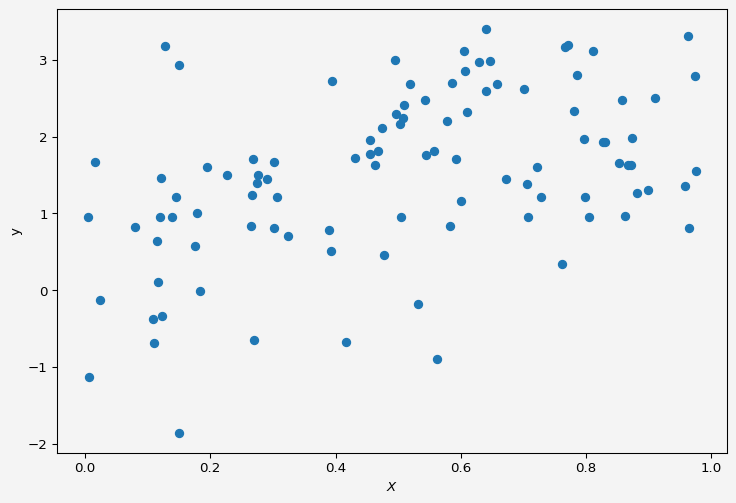

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(X,y)
plt.xlabel('$X$')
plt.ylabel('y')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

## Model

We want to fit a simple linear regression to the above data.

In [4]:
slr=LinearRegression()

Now to fit our data $X$ and $y$ we need to reshape the input variable.
Because if we look at $X$,

In [5]:
X

array([0.43076558, 0.4548476 , 0.49638872, 0.79872869, 0.91053026,
       0.72163829, 0.86700916, 0.58208333, 0.01534057, 0.5078218 ,
       0.60662878, 0.39026476, 0.81158048, 0.267743  , 0.96437996,
       0.15033475, 0.60479905, 0.08052397, 0.63989073, 0.83046629,
       0.50413823, 0.6461428 , 0.80387913, 0.26722423, 0.77091468,
       0.47412158, 0.39211634, 0.18379831, 0.62935877, 0.97340035,
       0.17485819, 0.12159013, 0.12354514, 0.50332154, 0.5424863 ,
       0.17899689, 0.82739097, 0.2901846 , 0.58606079, 0.30116878,
       0.15060561, 0.85768307, 0.54470695, 0.86138521, 0.11688797,
       0.60981644, 0.53087761, 0.41701907, 0.00702705, 0.79602125,
       0.97594924, 0.87323469, 0.26579206, 0.32470155, 0.00409448,
       0.49414383, 0.27551425, 0.57733311, 0.70603213, 0.85175679,
       0.45487099, 0.65781263, 0.22687265, 0.14582616, 0.56202995,
       0.46703819, 0.19458218, 0.72758629, 0.7857481 , 0.1099678 ,
       0.46367471, 0.64000271, 0.76610359, 0.89924502, 0.13861

It is a one-dimensional array/vector but the `slr` object accepts input
variable as matrix or two-dimensional format.

In [6]:
X=X.reshape(-1,1)
X[:10]

array([[0.43076558],
       [0.4548476 ],
       [0.49638872],
       [0.79872869],
       [0.91053026],
       [0.72163829],
       [0.86700916],
       [0.58208333],
       [0.01534057],
       [0.5078218 ]])

Now we fit the data to our model

In [7]:
slr.fit(X,y)
slr.predict([[2],[3]])

array([4.16700632, 5.94126893])

We have our $X=2,3$ and the corresponding $y$ values are from the above
cell output, which are pretty close to the model $y=2x+\frac{1}{2}$.

In [8]:
intercept = round(slr.intercept_,4)
slope = slr.coef_

Now our model parameters are: intercept $\beta_0=$ 0.6185 and slope
$\beta_1=$ array(\[1.77426261\]).

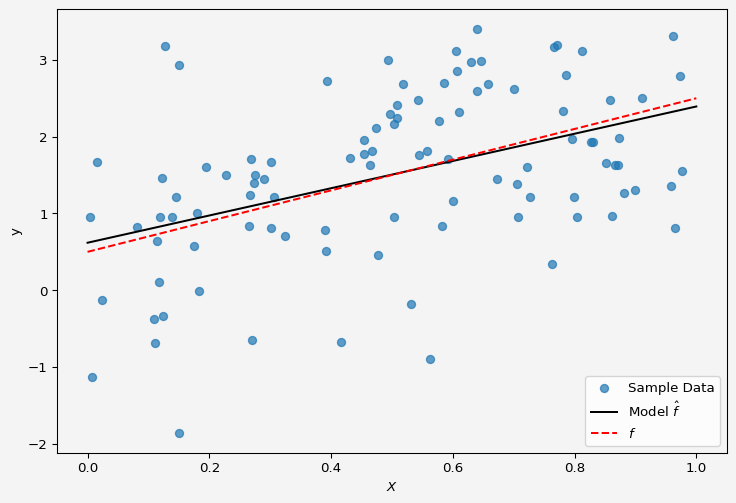

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, alpha=0.7,label="Sample Data")
plt.plot(np.linspace(0,1,100),
    slr.predict(np.linspace(0,1,100).reshape(-1,1)),
    'k',
    label='Model $\hat{f}$'
)
plt.plot(np.linspace(0,1,100),
    2*np.linspace(0,1,100)+0.5,
    'r--',
    label='$f$'
)
plt.xlabel('$X$')
plt.ylabel('y')
plt.legend(fontsize=10)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

So the model fits the data almost perfectly.

Up next [multiple linear
regression](../../dsandml/multiplelinreg/index.qmd).

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/simplelinreg/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**